In [1]:
import soccerdata as sd
from joblib import Parallel, delayed
import pandas as pd
from tqdm import tqdm
import numpy as np

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler

[05/20/24 18:18:42] INFO     No custom team name replacements found. You can configure these in       ]8;id=667665;file://c:\Users\gfuen\AppData\Local\Programs\Python\Python310\lib\site-packages\soccerdata\_config.py\_config.py]8;;\:]8;id=511894;file://c:\Users\gfuen\AppData\Local\Programs\Python\Python310\lib\site-packages\soccerdata\_config.py#87\87]8;;\
                             C:\Users\gfuen\soccerdata\config\teamname_replacements.json.                          

                    INFO     No custom league dict found. You can configure additional leagues in    ]8;id=995022;file://c:\Users\gfuen\AppData\Local\Programs\Python\Python310\lib\site-packages\soccerdata\_config.py\_config.py]8;;\:]8;id=200002;file://c:\Users\gfuen\AppData\Local\Programs\Python\Python310\lib\site-packages\soccerdata\_config.py#283\283]8;;\
                             C:\Users\gfuen\soccerdata\config\league_dict.json.                                    

In [2]:
# !git clone https://github.com/domingomery/balu3
# !pip install ./balu3
from   balu3.fs.sel    import sfs, clean

In [3]:
df_WS = pd.read_csv("WhoScoredTeamNumMatches15Spatial12x8TimeDiv90.csv")
# df_WS = pd.read_csv("WhoScoredTeamNumMatches15Spatial4x4TimeDiv45.csv")

df_WS = df_WS.drop(["Unnamed: 0", "Unnamed: 0.1"], axis =1)

In [4]:
df_WS.head()

,Team,Date,Goals,Number_matches,game_id,Pass_Successful_bin_0_time_0-90,Pass_Unsuccessful_bin_0_time_0-90,Pass_Successful_bin_1_time_0-90,Pass_Unsuccessful_bin_1_time_0-90,Pass_Successful_bin_2_time_0-90,...,Error_Successful_bin_91_time_0-90,Error_Unsuccessful_bin_91_time_0-90,Error_Successful_bin_92_time_0-90,Error_Unsuccessful_bin_92_time_0-90,Error_Successful_bin_93_time_0-90,Error_Unsuccessful_bin_93_time_0-90,Error_Successful_bin_94_time_0-90,Error_Unsuccessful_bin_94_time_0-90,Error_Successful_bin_95_time_0-90,Error_Unsuccessful_bin_95_time_0-90
0,West Ham,2010-08-14,0,0,410988,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Aston Villa,2010-08-14,3,0,410988,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Everton,2010-08-14,0,0,410989,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Blackburn,2010-08-14,1,0,410989,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Bolton,2010-08-14,0,0,410991,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
ids = df_WS.game_id.unique()

In [6]:
df_WS[df_WS.game_id == ids[2000]]

,Team,Date,Goals,Number_matches,game_id,Pass_Successful_bin_0_time_0-90,Pass_Unsuccessful_bin_0_time_0-90,Pass_Successful_bin_1_time_0-90,Pass_Unsuccessful_bin_1_time_0-90,Pass_Successful_bin_2_time_0-90,...,Error_Successful_bin_91_time_0-90,Error_Unsuccessful_bin_91_time_0-90,Error_Successful_bin_92_time_0-90,Error_Unsuccessful_bin_92_time_0-90,Error_Successful_bin_93_time_0-90,Error_Unsuccessful_bin_93_time_0-90,Error_Successful_bin_94_time_0-90,Error_Unsuccessful_bin_94_time_0-90,Error_Successful_bin_95_time_0-90,Error_Unsuccessful_bin_95_time_0-90
4000,Stoke,2015-10-31,0,15,959569,9.0,7.0,16.0,10.0,55.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4001,Newcastle,2015-10-31,0,15,959569,13.0,6.0,16.0,10.0,31.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
aux = df_WS[df_WS.game_id == ids[1000]]
goalsDiff = aux.iloc[0]["Goals"] - aux.iloc[1]["Goals"]
aux

,Team,Date,Goals,Number_matches,game_id,Pass_Successful_bin_0_time_0-90,Pass_Unsuccessful_bin_0_time_0-90,Pass_Successful_bin_1_time_0-90,Pass_Unsuccessful_bin_1_time_0-90,Pass_Successful_bin_2_time_0-90,...,Error_Successful_bin_91_time_0-90,Error_Unsuccessful_bin_91_time_0-90,Error_Successful_bin_92_time_0-90,Error_Unsuccessful_bin_92_time_0-90,Error_Successful_bin_93_time_0-90,Error_Unsuccessful_bin_93_time_0-90,Error_Successful_bin_94_time_0-90,Error_Unsuccessful_bin_94_time_0-90,Error_Successful_bin_95_time_0-90,Error_Unsuccessful_bin_95_time_0-90
2000,Stoke,2013-02-02,0,15,615168,6.0,10.0,11.0,7.0,24.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2001,Arsenal,2013-02-02,1,15,615168,3.0,1.0,12.0,11.0,27.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
df = df_WS
# df = pd.concat([df_WS, pd.get_dummies(df_WS['Team'], dtype = int)], axis=1)

In [9]:
ids = df.game_id.unique()
resultados = []
y = []
for i in  tqdm(range(len(ids))):
    aux = df[df.game_id == ids[i]]
    if aux["Number_matches"].iloc[0] == 15 and aux["Number_matches"].iloc[1] == 15:
        goalsDiff = aux.iloc[0]["Goals"] - aux.iloc[1]["Goals"]
        
        # One Hot
        # if goalsDiff > 0:
        #     y.append([1, 0, 0]) # Gana team 1
        # if goalsDiff < 0:
        #     y.append([0, 0, 1]) # Gana team 2
        # if goalsDiff == 0:
        #     y.append([0, 1, 0]) # Empate
            
        # Sparse
        if goalsDiff > 0:
            y.append(0) # Gana team 1
        if goalsDiff == 0:
            y.append(1) # Empate
        if goalsDiff < 0:
            y.append(2) # Gana team 2


        aux = aux.drop(["Date", "game_id", "Goals", "Team", "Number_matches"], axis = 1)

        resultados.append(pd.DataFrame(pd.concat([aux.iloc[0].add_prefix("Team1_"), aux.iloc[1].add_prefix("Team2_")])).T)

X = pd.concat(resultados)
y = np.array(y)


100%|██████████| 22968/22968 [07:21<00:00, 52.07it/s] 


In [ ]:
# from imblearn.over_sampling import SMOTENC

# # Supongamos que tienes las características X y las etiquetas y
# X = df.drop('target', axis=1)
# y = df['target']

# # Índices de las columnas categóricas
# categorical_features = [X.columns.get_loc(col) for col in X.select_dtypes(include=['category', 'object']).columns]

# # Crear una instancia de SMOTENC
# smote_nc = SMOTENC(categorical_features=categorical_features, random_state=0)

# # Aplicar SMOTENC para generar nuevas muestras
# X_resampled, y_resampled = smote_nc.fit_resample(X, y)

# # Crear un nuevo DataFrame con los datos aumentados
# augmented_df = pd.DataFrame(X_resampled, columns=X.columns)
# augmented_df['target'] = y_resampled

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size=0.2, random_state=42)
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

min_max_scaler = MinMaxScaler()
min_max_scaler.fit(X_train)

X_train_norm = min_max_scaler.transform(X_train)   
X_test_norm  = min_max_scaler.transform(X_test)    
# X_val_norm  = min_max_scaler.transform(X_val_clean)    

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size=0.2)
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

sclean       = clean(X_train)      # indices of selected features
X_train_clean = X_train[:,sclean]   # new training
X_test_clean  = X_test[:,sclean]    # new testing
# X_val_clean  = X_val[:,sclean]    # new testing

min_max_scaler = MinMaxScaler()
min_max_scaler.fit(X_train_clean)

X_train_norm = min_max_scaler.transform(X_train_clean)   
X_test_norm  = min_max_scaler.transform(X_test_clean)    
# X_val_norm  = min_max_scaler.transform(X_val_clean)  

 
# standar_scaler = StandardScaler() 
# standar_scaler.fit(X_train_clean)

# X_train_norm = standar_scaler.transform(X_train_clean)   
# X_test_norm  = standar_scaler.transform(X_test_clean)    
# X_val_norm  = standar_scaler.transform(X_val_clean)  

In [ ]:
indx_sfs = sfs(X_train_norm, y_train, 30, show=True)

In [ ]:
X_train_ = X_train_norm[:,indx_sfs[:13]]
X_test_ = X_test_norm[:,indx_sfs[:13]]

In [37]:
X_train_ = X_train_norm
X_test_ = X_test_norm

In [39]:
import tensorflow as tf
from tensorflow.keras import layers
from keras.callbacks import ReduceLROnPlateau

batch_size = 16
epoch = 100

# Define el modelo
# Construir el modelo
# Crear el modelo
model = tf.keras.Sequential([
    # layers.Dense(256, activation='relu'),
    # layers.Dense(128, activation='relu'),
    # layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax', use_bias= False)
])
# Compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  
              metrics=['accuracy'])

# learning_rate_reduction = ReduceLROnPlateau(
#     monitor="val_loss",
#     factor=0.5,
#     patience=3,
#     verbose=0,
#     mode="auto",
#     min_delta=0.0001,
#     cooldown=0,
#     min_lr=0.0)

# callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=2)

# # Entrenamos el modelo
history = model.fit(X_train_, y_train, verbose=1, epochs=epoch, batch_size=batch_size,
                    validation_data=(X_test_, y_test))

Epoch 1/100
1053/1053 [==============================] - 3s 2ms/step - loss: 1.0584 - accuracy: 0.4609 - val_loss: 1.0584 - val_accuracy: 0.4613
Epoch 2/100
1053/1053 [==============================] - 2s 2ms/step - loss: 0.9855 - accuracy: 0.5208 - val_loss: 1.0766 - val_accuracy: 0.4444
Epoch 3/100
1053/1053 [==============================] - 2s 2ms/step - loss: 0.9498 - accuracy: 0.5445 - val_loss: 1.1576 - val_accuracy: 0.4007
Epoch 4/100
1053/1053 [==============================] - 2s 2ms/step - loss: 0.9207 - accuracy: 0.5670 - val_loss: 1.1199 - val_accuracy: 0.4297
Epoch 5/100
1053/1053 [==============================] - 2s 2ms/step - loss: 0.9020 - accuracy: 0.5749 - val_loss: 1.1711 - val_accuracy: 0.4107
Epoch 6/100
1053/1053 [==============================] - 2s 2ms/step - loss: 0.8841 - accuracy: 0.5853 - val_loss: 1.1544 - val_accuracy: 0.4285
Epoch 7/100
1053/1053 [==============================] - 2s 2ms/step - loss: 0.8679 - accuracy: 0.6024 - val_loss: 1.3050 - val_ac

KeyboardInterrupt: 

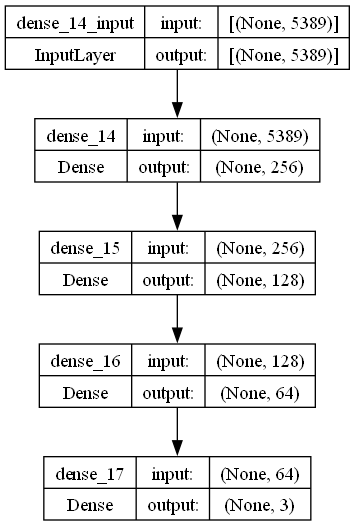

In [31]:
from keras.utils import plot_model

# Guardar el diagrama en un archivo
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [32]:
from sklearn.metrics import classification_report, confusion_matrix

# Predicciones en el conjunto de prueba
y_pred = model.predict(X_test_).argmax(axis=1)

# # # Métricas
print("Classification Report:")
print(classification_report(y_test, y_pred))


132/132 [==============================] - 1s 3ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.52      0.50      1642
           1       0.28      0.32      0.30      1064
           2       0.47      0.39      0.42      1504

    accuracy                           0.42      4210
   macro avg       0.41      0.41      0.41      4210
weighted avg       0.43      0.42      0.42      4210



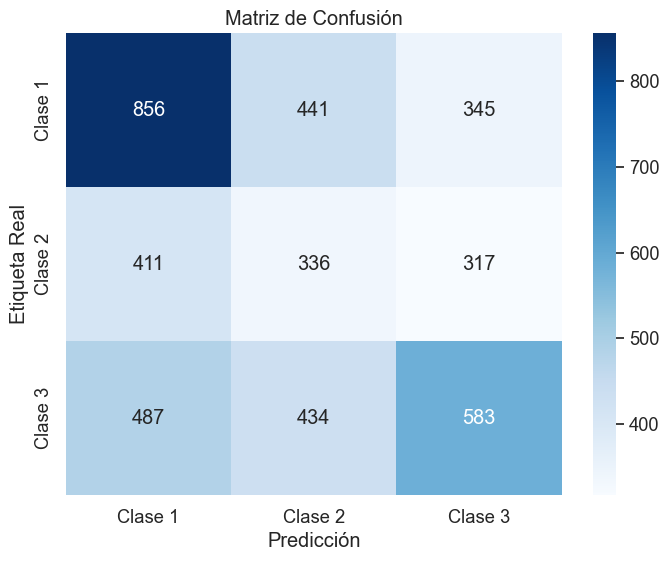

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Etiquetas de clase
class_labels = ["Clase 1", "Clase 2", "Clase 3"]

# Crear figura
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2) # Ajustar el tamaño de la fuente para una mejor legibilidad
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)

# Añadir etiquetas
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Real')
plt.title('Matriz de Confusión')

# Mostrar la matriz de confusión
plt.show()

In [34]:
import numpy as np
import pandas as pd
from pytorch_tabnet.tab_model import TabNetClassifier, TabNetRegressor
from sklearn.model_selection import train_test_split

# Crear y entrenar el modelo TabNet
clf = TabNetClassifier()
clf.fit(X_train_, y_train, eval_set=[(X_test_, y_test)], max_epochs = 200, patience= 10, batch_size = 64)

# Evaluar el modelo
test_predictions = clf.predict(X_test_)
# Puedes calcular las métricas de rendimiento aquí

epoch 0  | loss: 1.11757 | val_0_accuracy: 0.39952 |  0:00:40s
epoch 1  | loss: 1.06854 | val_0_accuracy: 0.44323 |  0:01:21s
epoch 2  | loss: 1.05356 | val_0_accuracy: 0.47126 |  0:02:01s
epoch 3  | loss: 1.03941 | val_0_accuracy: 0.46698 |  0:02:42s
epoch 4  | loss: 1.02707 | val_0_accuracy: 0.48812 |  0:03:22s
epoch 5  | loss: 1.014   | val_0_accuracy: 0.4658  |  0:04:03s
epoch 6  | loss: 1.00464 | val_0_accuracy: 0.45701 |  0:04:40s
epoch 7  | loss: 0.98961 | val_0_accuracy: 0.46295 |  0:05:19s
epoch 8  | loss: 0.97458 | val_0_accuracy: 0.45748 |  0:06:00s
epoch 9  | loss: 0.95969 | val_0_accuracy: 0.46532 |  0:06:40s
epoch 10 | loss: 0.9452  | val_0_accuracy: 0.45226 |  0:07:21s
epoch 11 | loss: 0.92551 | val_0_accuracy: 0.45772 |  0:08:03s


KeyboardInterrupt: 

In [17]:
from sklearn.metrics import classification_report, confusion_matrix

# Predicciones en el conjunto de prueba
y_pred = clf.predict(X_test_norm)

# Métricas
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.64      0.56      1669
           1       0.00      0.00      0.00      1036
           2       0.46      0.63      0.53      1505

    accuracy                           0.48      4210
   macro avg       0.32      0.42      0.36      4210
weighted avg       0.36      0.48      0.41      4210



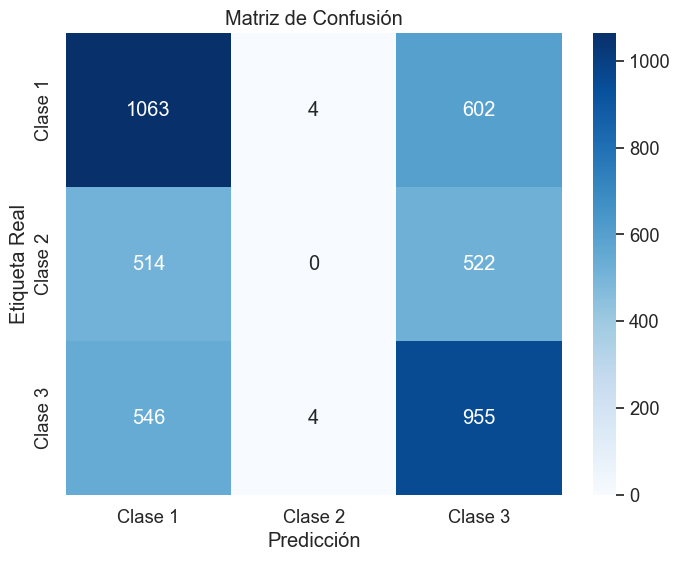

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Etiquetas de clase
class_labels = ["Clase 1", "Clase 2", "Clase 3"]

# Crear figura
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2) # Ajustar el tamaño de la fuente para una mejor legibilidad
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)

# Añadir etiquetas
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Real')
plt.title('Matriz de Confusión')

# Mostrar la matriz de confusión
plt.show()

In [19]:
# Importar las bibliotecas necesarias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Crear y entrenar el modelo de regresión logística
model = LogisticRegression()
model.fit(X_train_, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test_)

# Calcular la precisión del modelo
accuracy = np.mean(y_pred == y_test)
print("Precisión del modelo:", accuracy)

Precisión del modelo: 0.4327790973871734
